# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 5 submission</b></u>

### Roster Name: Houman Irani
### Preferred Name (if different): Chosen Name
### Student ID: 014716182
### Email address: houman.irani@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [12]:
np.random.seed(42)

#### Code the solution

In [13]:
mushroom = pd.read_csv("/Users/houmanirani/Downloads/homework5_input_data.csv")
X = mushroom[mushroom.columns[1:]]
Y = mushroom[mushroom.columns[0]]
X_numeric = pd.get_dummies(X, columns=X.columns, prefix=X.columns)
X_numeric.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
Y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_numeric, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6499, 117), (6499,), (1625, 117), (1625,))

In [16]:
model = DecisionTreeClassifier(random_state=0)

# we can first score our model through cross validation (applicable to any supervised model we learn)
arr = cross_val_score(model, X_train, Y_train, cv=5)
print(arr)
np.mean(arr)

[1. 1. 1. 1. 1.]


1.0

In [17]:
model.fit(X_train, Y_train)

print('Accuracy on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.00


Confusion matrix, without normalization
[[852   0]
 [  0 773]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


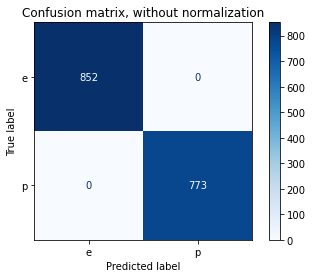

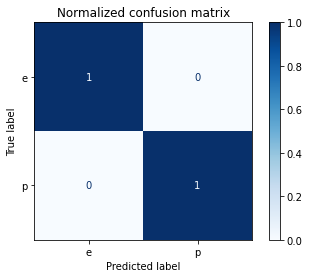

In [18]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()